In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [3]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Feature Importance

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11022521 0.07248792 0.05891976 0.03382251 0.0196387  0.0190962
 0.01614838 0.05244839 0.03272722 0.03711237 0.05200992 0.06345241
 0.01859829 0.05240865 0.03011373 0.02657468 0.03326954 0.03209744
 0.02847358 0.04112924 0.02717261 0.02872715 0.00664244 0.0214186
 0.02725345 0.01677806 0.00644971 0.01038791 0.00734839 0.01706752]


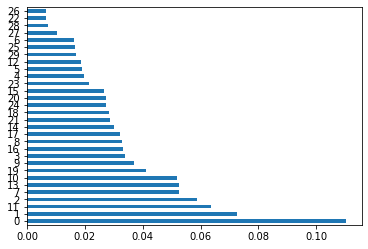

In [4]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(tX,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

## Correlation matrix

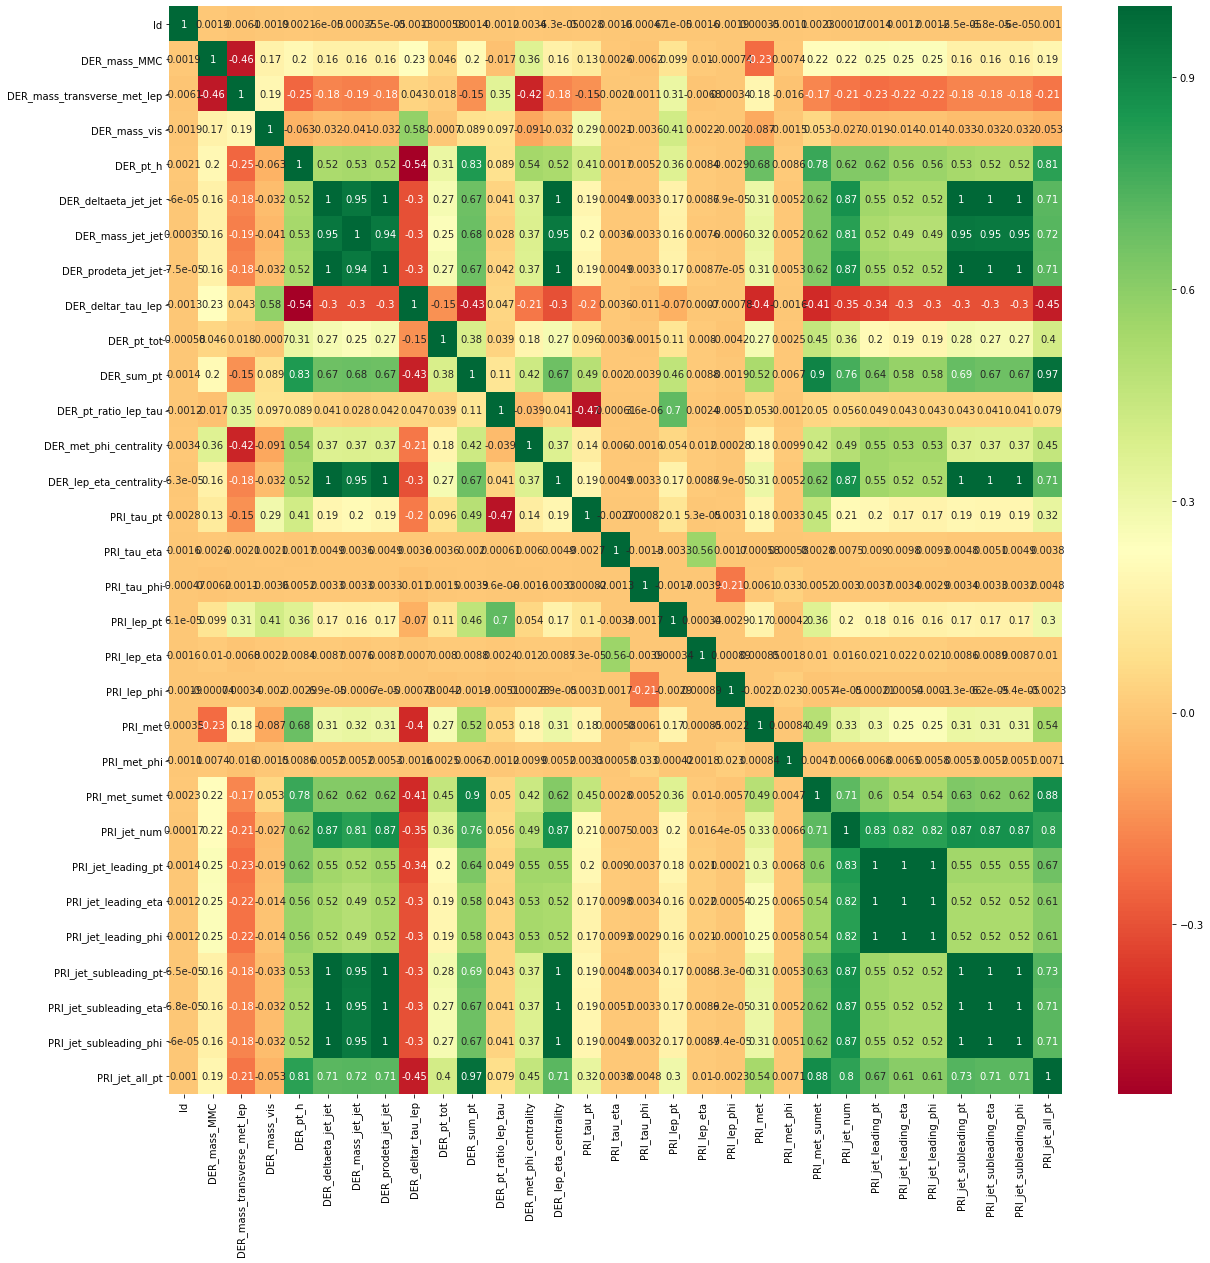

In [5]:
import pandas as pd
import seaborn as sns

data = pd.read_csv(DATA_TRAIN_PATH)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Delete features 

In [4]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 

#vire les colonnes avec features pas importantes ou les colonnes très corrélées entre elles
columns_bad_correl = [30, 29, 28, 27, 25, 24, 7, 6]
correl_ = np.delete(tX, columns_bad_correl, axis=1)

#vire les colonnes avec trop de undefined values
bounds = [0.2, 0.5]
tX_after, indices = treat_undefined_values(bounds, correl_)

In [5]:
#MODEL BUILDING
tx, mean, std = standardize(tX,0)
y, tx = build_model_data(tx,y)

In [6]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)